# Importowanie bibliotek

In [176]:
from PyPDF2 import PdfReader
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Łukasz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Funkcja czytająca pliki w formacie PDF
Funkcja `read_pdf` służy do odczytywania zawartości plików PDF. Przyjmuje jeden argument file_path, który jest ścieżką do pliku PDF.

In [177]:
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        num_pages = len(pdf_reader.pages)

        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
        
        return text

In [178]:
book1_path = 'J.R.R. Tolkien - Hobbit, czyli tam i z powrotem.pdf'
book2_path = 'J.R.R Tolkien - Władca pierścieni. Bractwo Pierścienia. Tom 1.pdf'
book3_path = 'J.R.R. Tolkien - Władca Pierścieni. Dwie Wieże. Tom 2.pdf'
book4_path = 'J.R.R. Tolkien - Władca Pierścieni. Powrót Króla. Tom 3.pdf'

book1 = read_pdf(book1_path)
book2 = read_pdf(book2_path)
book3 = read_pdf(book3_path)
book4 = read_pdf(book4_path)

# Funkcja do czyszczenia i tokenizacji tekstu

In [179]:
def cleaned_book(text):
    temp = re.sub("\s{2,}", " ", text) #usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp) #usunięcie przerw między słowami, entery
    temp = temp.lower() #zamienia wszystkie znaki na małe litery
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) #usunięcie znaków specjalnych
    #temp = re.sub("\d", "", temp) #usunięcie cyfr
    temp = re.sub("[^\w\s]", "", temp) #usunięcie znaków specjalnych
    temp = temp.strip() #usunięcie spacji lub odstępów na końcach tekstu
    
    #Implementacja stopwordsów dla języka polskiego z pliku polish_stopwords.txt oraz dodanie do zbioru wyrażeń powstałych wskutek błędnego oczyszczenia tekstu
    with open("polish_stopwords.txt", "r", encoding="utf-8") as file:
        polish_stopwords = [line.strip() for line in file.readlines()]
        
    stopwords = polish_stopwords + ['pa', 'ba', 'zd', 'ec', 'pi', 'cza', 'cze', 'pie', 'gło', 'la', 'zw', 'roz', 'ra', 'si', 'ac', 'sci', 'ał', 'ły', 'sc', 'ju', 'mo', 'wi', 'ście', 'ąc', 'ął', 'smy', 'ło', 'scie', 'ni', 'ad', 'ła', 'ść', 'zy', 'sli', 'ści', 'śli', 'łem']
    
    #Tokenizacja tekstu za pomocą biblioteki NLTK
    cleaned_and_tokenized = nltk.word_tokenize(temp)
    
    # Usunięcie stopwordsów
    cleaned_and_tokenized_without_stopwords = [word for word in cleaned_and_tokenized if word.lower() not in stopwords]
    
    return cleaned_and_tokenized_without_stopwords

# Oczyszczenie książek

In [180]:
book1_cleaned = cleaned_book(book1)
book2_cleaned = cleaned_book(book2)
book3_cleaned = cleaned_book(book3)
book4_cleaned = cleaned_book(book4)

# Policzenie wszystkich słów w korpusie składającym się z 4 książek

In [181]:
total_words = len(book1_cleaned) + len(book2_cleaned) + len(book3_cleaned) + len(book4_cleaned)

print("Liczba wszystkich słów w korpusie:", total_words)

Liczba wszystkich słów w korpusie: 357320


# Wygenerowanie chmury słów dla słów występujących we wszystkich 4 książkach

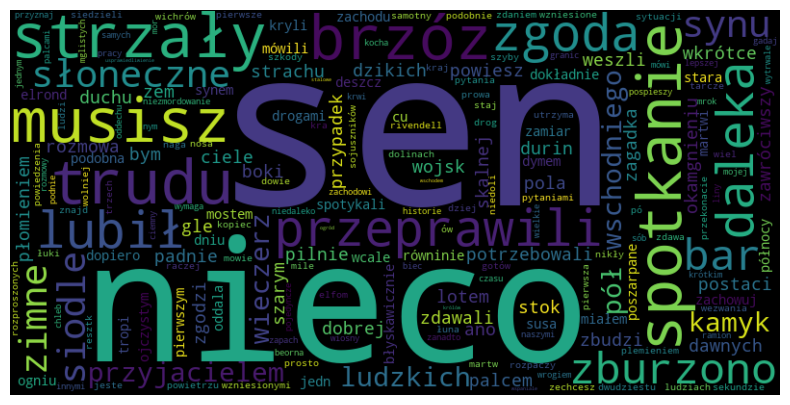

In [100]:
common_words = set(book1_cleaned).intersection(book2_cleaned, book3_cleaned, book4_cleaned)

wordcloud_common = WordCloud(width=800, height=400).generate(' '.join(common_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_common, interpolation='bilinear')
plt.axis('off')
plt.show()

# Wygenerowanie chmur słów dla unikatowych słów występujących tylko w poszczególnych książkach

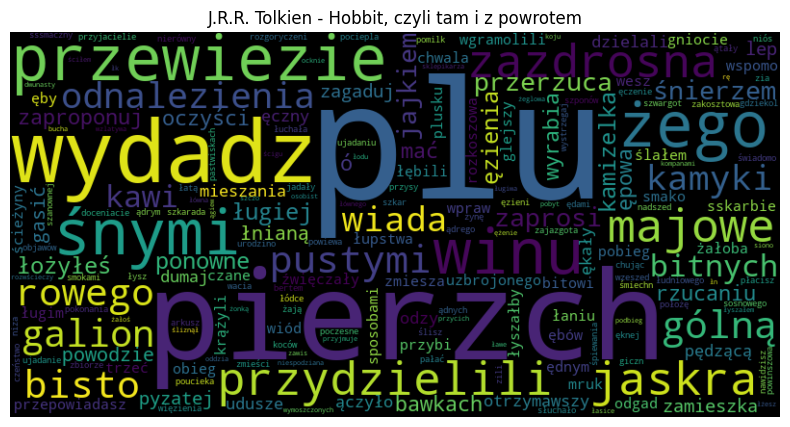

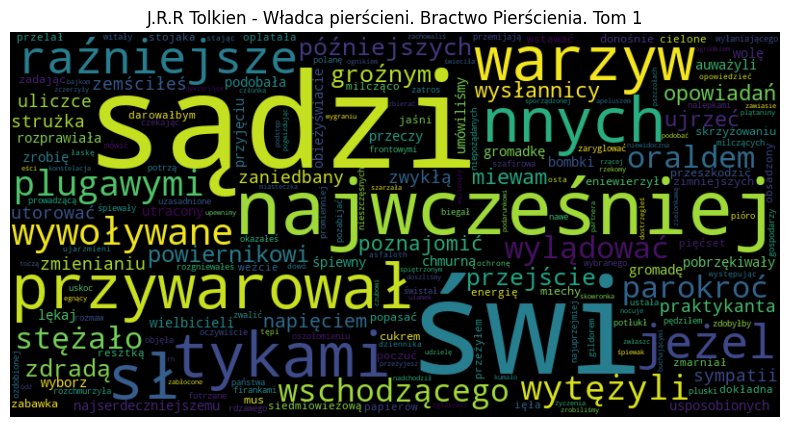

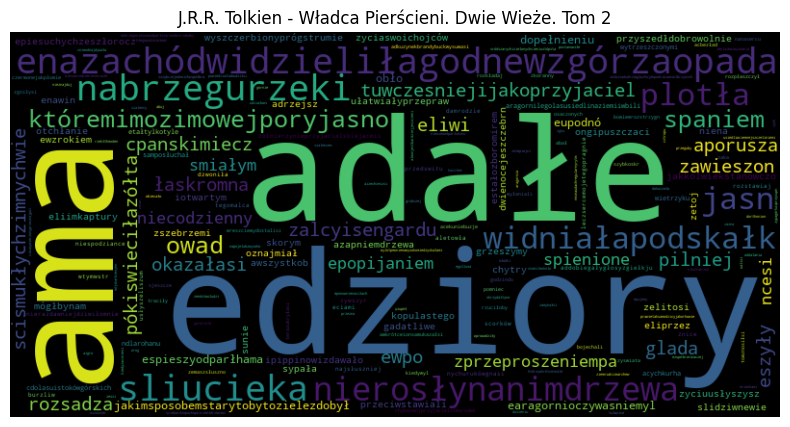

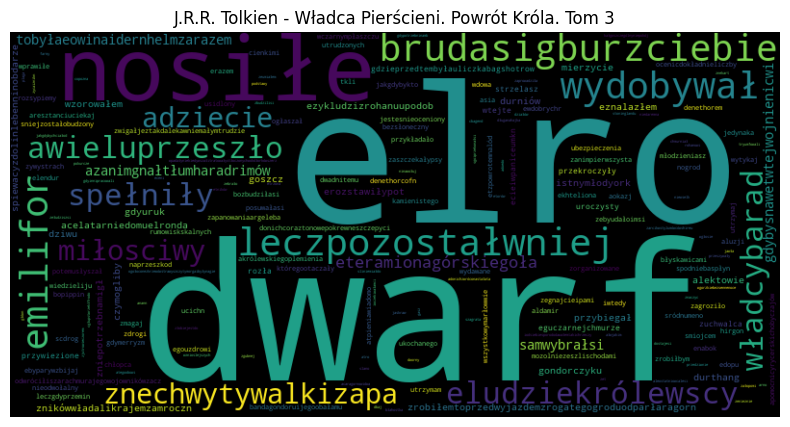

In [94]:
unique_words_book1 = set(book1_cleaned) - set(book2_cleaned) - set(book3_cleaned) - set(book4_cleaned)
unique_words_book2 = set(book2_cleaned) - set(book1_cleaned) - set(book3_cleaned) - set(book4_cleaned)
unique_words_book3 = set(book3_cleaned) - set(book1_cleaned) - set(book2_cleaned) - set(book4_cleaned)
unique_words_book4 = set(book4_cleaned) - set(book1_cleaned) - set(book2_cleaned) - set(book3_cleaned)

wordcloud_book1 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book1))
wordcloud_book2 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book2))
wordcloud_book3 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book3))
wordcloud_book4 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book4))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book1, interpolation='bilinear')
plt.title('J.R.R. Tolkien - Hobbit, czyli tam i z powrotem')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book2, interpolation='bilinear')
plt.title('J.R.R Tolkien - Władca pierścieni. Bractwo Pierścienia. Tom 1')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book3, interpolation='bilinear')
plt.title('J.R.R. Tolkien - Władca Pierścieni. Dwie Wieże. Tom 2')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_book4, interpolation='bilinear')
plt.title('J.R.R. Tolkien - Władca Pierścieni. Powrót Króla. Tom 3')
plt.axis('off')
plt.show()

# Porównanie książek w podziale na rozdziały

In [44]:
def extract_chapter_from_pdf(book_path, start_page, end_page):
    with open(book_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        text = ''
        for page_number in range(start_page - 1, end_page):
            page = pdf_reader.pages[page_number]
            text += page.extract_text()
        return text

In [11]:
# Wyodrębnienie drugiego rozdziału z book1 (37-91 to strony, na których napisany jest rozdział 2 w PDF w book1)
book1_chapter2 = extract_chapter_from_pdf('Noise a flaw in human judgement.pdf', 37, 91)

# Wyodrębnienie pierwszego rozdziału z book2 (21-105 to strony na których napisany jest rozdział 1 w PDF w book2)
book2_chapter1 = extract_chapter_from_pdf('Thinking fast and slow.pdf', 21, 105)

# Sprawdzenie, czy wśród dokumentów występują przyjęte kategorie/grupy odzwierciedlające przyjętą dychotomię:

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Przygotowanie korpusu tekstowego
corpus = [book1_cleaned, book2_cleaned, book3_cleaned, book4_cleaned]
corpus_combined = [' '.join(text) for text in corpus]  # Połączenie tekstów w każdej liście

# Inicjalizacja wektoryzera
vectorizer = CountVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus_combined)

# Konfiguracja i dopasowanie modelu LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Wyświetlenie wyników
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
rzekł gandalf bilbo frodo wie odparł gór ko aragorn ka

Topic #1:
frodo rzekł gandalf powiedział odparł pierścień hobbici bilbo froda potem



In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Przygotowanie korpusu tekstowego
corpus = [book1_cleaned, book2_cleaned, book3_cleaned, book4_cleaned]
corpus_combined = [' '.join(text) for text in corpus]  # Połączenie tekstów w każdej liście

# Inicjalizacja wektoryzera
vectorizer = TfidfVectorizer(lowercase=False)
X = vectorizer.fit_transform(corpus_combined)

# Konfiguracja i dopasowanie modelu LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Wyświetlenie wyników
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    top_words_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_word_scores = [topic[i] for i in top_words_indices]
    for word, score in zip(top_words, top_word_scores):
        print(f"{word}: {score}")
    print()

Topic #0:
bilbo: 0.33340925385094095
thorin: 0.3334067141233267
rzek: 0.33340663763786266
pierścień: 0.33340441604752924
góry: 0.3334043749182336
hobbit: 0.33340288906321686
elfów: 0.33340265310946815
nagle: 0.3334025534047917
dalej: 0.33340243057530866
wreszcie: 0.33340205318379795

Topic #1:
frodo: 1.1869427930631955
rzekł: 0.9579425536040906
gandalf: 0.8253702178678785
bilbo: 0.8007829005289386
odparł: 0.7634623464631709
powiedział: 0.7170662875169316
aragorn: 0.6882751365157673
wie: 0.657940955112827
potem: 0.6236186217469009
pippin: 0.612539479298575

Topic #2:
bilbo: 0.3334093097394507
thorin: 0.3334067937211504
rzek: 0.3334067021158423
góry: 0.3334043944402584
pierścień: 0.3334043653240638
hobbit: 0.33340291449460335
elfów: 0.33340265878619263
nagle: 0.33340254569805455
dalej: 0.33340242825149524
wreszcie: 0.3334020476231173



In [182]:
# Przygotowanie korpusu tekstowego
corpus = [str(book1_cleaned), str(book2_cleaned), str(book3_cleaned), str(book4_cleaned)]

# Inicjalizacja wektoryzera
vectorizer = CountVectorizer(lowercase=False)

# Wektoryzacja tekstu
X = vectorizer.fit_transform(corpus)

# Inicjalizacja modelu LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)

# Dopasowanie modelu LDA
lda.fit(X)

# Wyświetlenie wyników dla poszczególnych książek
feature_names = vectorizer.get_feature_names_out()
for book_idx, book in enumerate(corpus):
    print(f"Book #{book_idx+1}:")
    book_topic_weights = lda.transform(X[book_idx])
    for topic_idx, topic_weight in enumerate(book_topic_weights[0]):
        top_words_idx = topic_weight.argsort()[:-11:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx} - Top words: {', '.join(top_words)}")
    print()

Book #1:
Topic #0 - Top words: 10
Topic #1 - Top words: 10
Topic #2 - Top words: 10

Book #2:
Topic #0 - Top words: 10
Topic #1 - Top words: 10
Topic #2 - Top words: 10

Book #3:
Topic #0 - Top words: 10
Topic #1 - Top words: 10
Topic #2 - Top words: 10

Book #4:
Topic #0 - Top words: 10
Topic #1 - Top words: 10
Topic #2 - Top words: 10

